                                    Mixed Linear Model Regression Results
Model:                               MixedLM                   Dependent Variable:                   Overall 
No. Observations:                    72                        Method:                               REML    
No. Groups:                          24                        Scale:                                0.2561  
Min. group size:                     3                         Log-Likelihood:                       -70.1427
Max. group size:                     3                         Converged:                            Yes     
Mean group size:                     3.0                                                                     
-------------------------------------------------------------------------------------------------------------
                                                                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------

C:\Users\goatp\AppData\Local\Temp\ipykernel_16036\4264036022.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('HeadSet')['Overall'].mean()
C:\Users\goatp\AppData\Local\Temp\ipykernel_16036\4264036022.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sems = df.groupby('HeadSet')['Overall'].sem()


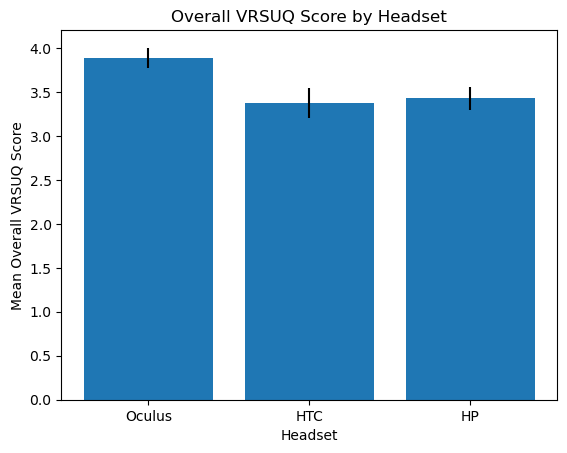

C:\Users\goatp\AppData\Local\Temp\ipykernel_16036\4264036022.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = df.groupby(['HeadSet', 'Gender'])['Overall'].mean().unstack()


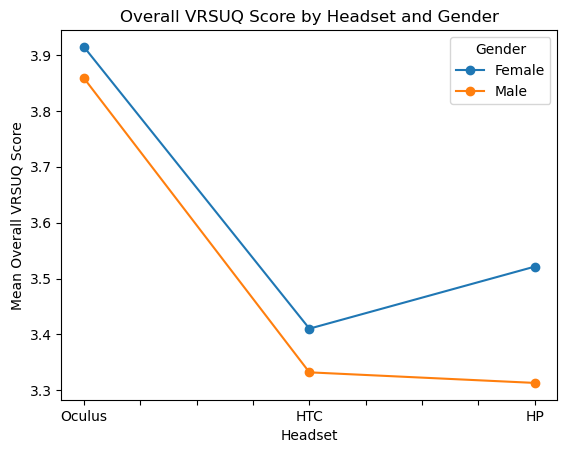

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r'C:\Users\ITXPC\OneDrive - The Pennsylvania State University\Amir_abb6024\ICCMJournal\Codes\VRUsability\VRSUQ.csv')

# Map Likert responses to numeric scores
mapping = {
    'strongly disagree': 1,
    'disagree': 2,
    'neutral': 3,
    'agree': 4,
    'strongly agree': 5
}
item_cols = df.columns[3:12]

# Clean and recode items
for col in item_cols:
    df[col] = df[col].str.strip().str.lower().map(mapping)

# Identify and reverse-code negative items
neg_cols = [col for col in item_cols if col.startswith('(-)')]
for col in neg_cols:
    df[col] = 6 - df[col]

# Compute overall usability score
df['Overall'] = df[item_cols].mean(axis=1)

# Clean categorical variables
df['HeadSet'] = df['HeadSet'].str.strip().astype('category')
df['HeadSet'] = df['HeadSet'].cat.set_categories(['Oculus', 'HTC', 'HP'])
df['Gender'] = df['Gender'].str.strip()

# Mixed-effects model: Overall ~ Headset * Gender, random intercepts for participants
model = mixedlm(
    "Overall ~ C(HeadSet, Treatment(reference='Oculus')) * C(Gender)",
    df.dropna(subset=['Overall', 'HeadSet', 'Gender']),
    groups=df["UniqueID"]
)
result = model.fit()
print(result.summary())

# Visualization 1: Mean overall score by headset
means = df.groupby('HeadSet')['Overall'].mean()
sems = df.groupby('HeadSet')['Overall'].sem()

fig, ax = plt.subplots()
ax.bar(means.index, means.values, yerr=sems.values)
ax.set_xlabel('Headset')
ax.set_ylabel('Mean Overall VRSUQ Score')
ax.set_title('Overall VRSUQ Score by Headset')
plt.show()

# Visualization 2: Overall score by headset, split by gender
pivot = df.groupby(['HeadSet', 'Gender'])['Overall'].mean().unstack()

fig, ax = plt.subplots()
pivot.plot(marker='o', ax=ax)
ax.set_xlabel('Headset')
ax.set_ylabel('Mean Overall VRSUQ Score')
ax.set_title('Overall VRSUQ Score by Headset and Gender')
plt.show()


Data Summary:
Total participants: 24
Total observations: 72

Headset distribution:
HeadSet
Oculus    24
HTC       24
HP        24
Name: count, dtype: int64

Gender distribution:
Gender
Female    39
Male      33
Name: count, dtype: int64

MIXED ANOVA RESULTS
        Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0       Gender  0.232801    1   22  0.232801  0.254499  0.618940  0.011436   
1      HeadSet  3.853315    2   44  1.926657  7.524139  0.001547  0.254847   
2  Interaction  0.080638    2   44  0.040319  0.157456  0.854793  0.007106   

        eps  
0       NaN  
1  0.867276  
2       NaN  

POST-HOC ANALYSES

Significant main effect of HeadSet (p = 0.0015)
Pairwise comparisons for HeadSet (with correction for multiple comparisons):
        A    B         T     p-unc    p-corr    hedges
0  Oculus  HTC  3.428568  0.002294  0.006882  0.722313
1  Oculus   HP  4.088412  0.000452  0.001355  0.765846
2     HTC   HP -0.317398  0.753805  1.000000 -0.069319

No sign

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_51316\2534182972.py:174: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df_clean.groupby('HeadSet')['Overall'].mean()
C:\Users\ITXPC\AppData\Local\Temp\ipykernel_51316\2534182972.py:175: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sems = df_clean.groupby('HeadSet')['Overall'].sem()


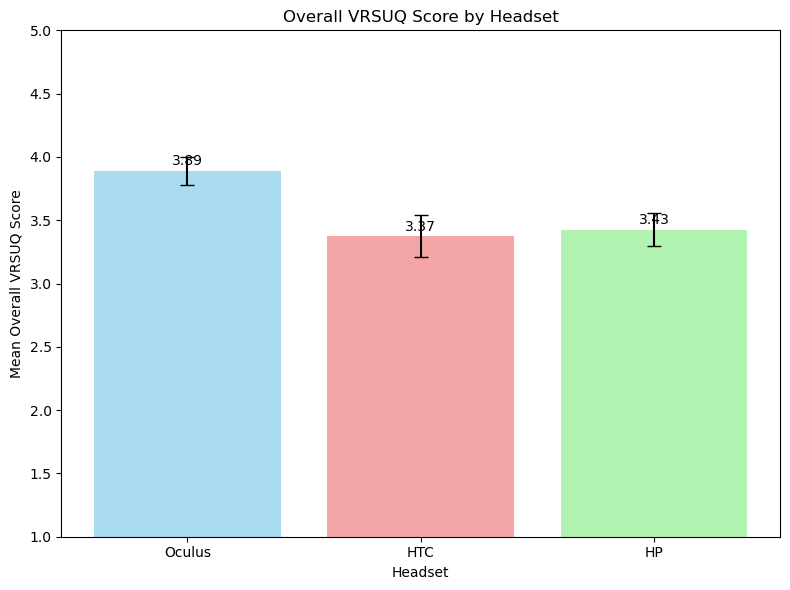

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_51316\2534182972.py:194: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = df_clean.groupby(['HeadSet', 'Gender'])['Overall'].mean().unstack()


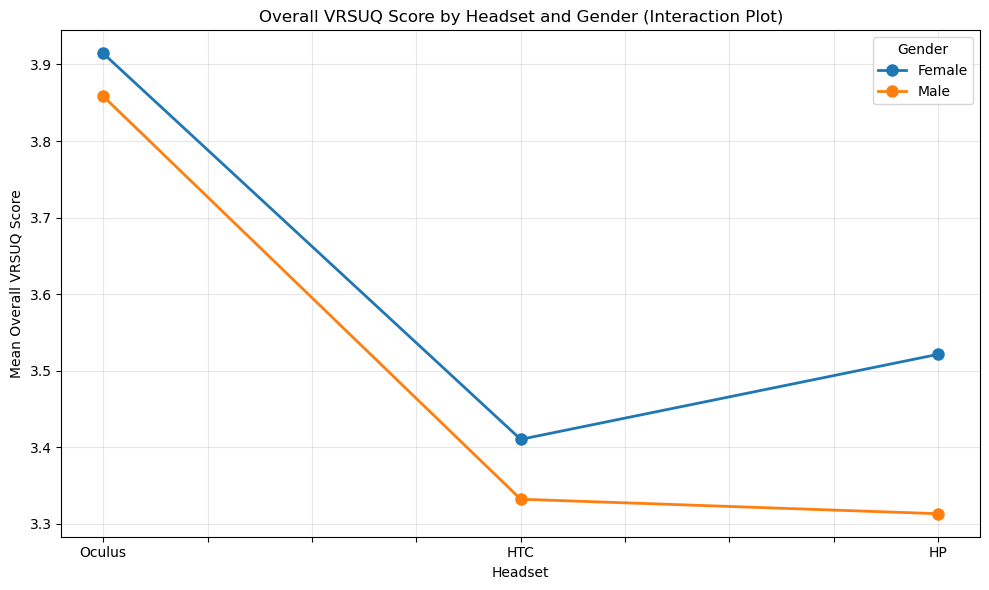

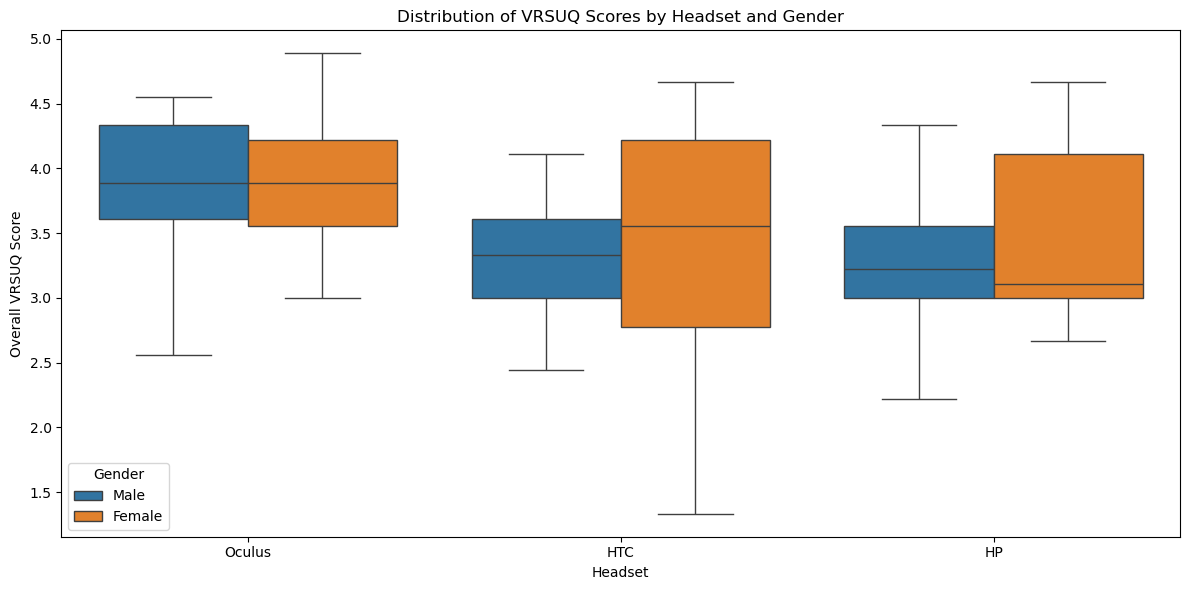


DESCRIPTIVE STATISTICS
                count   mean    std    sem
HeadSet Gender                            
Oculus  Female     13  3.915  0.503  0.140
        Male       11  3.859  0.638  0.193
HTC     Female     13  3.410  1.039  0.288
        Male       11  3.332  0.496  0.149
HP      Female     13  3.521  0.655  0.182
        Male       11  3.313  0.610  0.184


C:\Users\ITXPC\AppData\Local\Temp\ipykernel_51316\2534182972.py:218: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_clean.groupby(['HeadSet', 'Gender'])['Overall'].agg([


In [12]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r'C:\Users\ITXPC\OneDrive - The Pennsylvania State University\Amir_abb6024\ICCMJournal\Codes\VRUsability\VRSUQ.csv')

# Map Likert responses to numeric scores
mapping = {
    'strongly disagree': 1,
    'disagree': 2,
    'neutral': 3,
    'agree': 4,
    'strongly agree': 5
}
item_cols = df.columns[3:12]

# Clean and recode items
for col in item_cols:
    df[col] = df[col].str.strip().str.lower().map(mapping)

# Identify and reverse-code negative items
neg_cols = [col for col in item_cols if col.startswith('(-)')]
for col in neg_cols:
    df[col] = 6 - df[col]

# Compute overall usability score
df['Overall'] = df[item_cols].mean(axis=1)

# Clean categorical variables
df['HeadSet'] = df['HeadSet'].str.strip().astype('category')
df['HeadSet'] = df['HeadSet'].cat.set_categories(['Oculus', 'HTC', 'HP'])
df['Gender'] = df['Gender'].str.strip()

# Clean data for analysis
df_clean = df.dropna(subset=['Overall', 'HeadSet', 'Gender', 'UniqueID'])

print("Data Summary:")
print(f"Total participants: {df_clean['UniqueID'].nunique()}")
print(f"Total observations: {len(df_clean)}")
print("\nHeadset distribution:")
print(df_clean['HeadSet'].value_counts())
print("\nGender distribution:")
print(df_clean['Gender'].value_counts())

# Mixed ANOVA using pingouin
# HeadSet = within-subjects factor (repeated measures)
# Gender = between-subjects factor
print("\n" + "="*60)
print("MIXED ANOVA RESULTS")
print("="*60)

anova_result = pg.mixed_anova(
    data=df_clean,
    dv='Overall',           # Dependent variable
    within='HeadSet',       # Within-subjects factor
    between='Gender',       # Between-subjects factor
    subject='UniqueID'      # Subject identifier
)

print(anova_result)

# Effect sizes and post-hoc tests if main effects or interactions are significant
print("\n" + "="*60)
print("POST-HOC ANALYSES")
print("="*60)

# Check for significant main effect of HeadSet
headset_p = anova_result.loc[anova_result['Source'] == 'HeadSet', 'p-unc'].iloc[0]
if headset_p < 0.05:
    print(f"\nSignificant main effect of HeadSet (p = {headset_p:.4f})")
    print("Pairwise comparisons for HeadSet (with correction for multiple comparisons):")
    
    # Pairwise t-tests for headset comparisons (paired since it's within-subjects)
    pairwise_headset = pg.pairwise_tests(
        data=df_clean,
        dv='Overall',
        within='HeadSet',
        subject='UniqueID',
        padjust='bonferroni'
    )
    print(pairwise_headset[['A', 'B', 'T', 'p-unc', 'p-corr', 'hedges']])

# Check for significant main effect of Gender
gender_mask = anova_result['Source'] == 'Gender'
if gender_mask.any():
    gender_p = anova_result.loc[gender_mask, 'p-unc'].iloc[0]
    if gender_p < 0.05:
        print(f"\nSignificant main effect of Gender (p = {gender_p:.4f})")
        print("Gender means:")
        gender_means = df_clean.groupby('Gender')['Overall'].agg(['mean', 'std', 'count'])
        print(gender_means)
else:
    print("\nNo Gender effect found in results")

# Check for significant interaction - try different possible names
interaction_names = ['HeadSet * Gender', 'Gender * HeadSet', 'HeadSet:Gender', 'Interaction']
interaction_p = None
interaction_source = None

for name in interaction_names:
    interaction_mask = anova_result['Source'] == name
    if interaction_mask.any():
        interaction_p = anova_result.loc[interaction_mask, 'p-unc'].iloc[0]
        interaction_source = name
        break

# Also try looking for rows that contain both 'HeadSet' and 'Gender'
if interaction_p is None:
    for idx, source in enumerate(anova_result['Source']):
        if 'HeadSet' in str(source) and 'Gender' in str(source):
            interaction_p = anova_result.loc[idx, 'p-unc']
            interaction_source = source
            break

if interaction_p is not None:
    if interaction_p < 0.05:
        print(f"\nSignificant HeadSet × Gender interaction ({interaction_source}, p = {interaction_p:.4f})")
        print("Simple effects analysis needed - examining HeadSet effects within each Gender:")
        
        # Simple effects: HeadSet effect within each gender
        for gender in df_clean['Gender'].unique():
            gender_data = df_clean[df_clean['Gender'] == gender]
            if len(gender_data) > 0 and gender_data['UniqueID'].nunique() > 1:
                try:
                    simple_effect = pg.rm_anova(
                        data=gender_data,
                        dv='Overall',
                        within='HeadSet',
                        subject='UniqueID'
                    )
                    p_val = simple_effect['p-unc'].iloc[0]
                    print(f"\nHeadSet effect for {gender}: F = {simple_effect['F'].iloc[0]:.3f}, p = {p_val:.4f}")
                    
                    if p_val < 0.05:
                        pairwise_simple = pg.pairwise_tests(
                            data=gender_data,
                            dv='Overall',
                            within='HeadSet',
                            subject='UniqueID',
                            padjust='bonferroni'
                        )
                        print(f"Pairwise comparisons for {gender}:")
                        print(pairwise_simple[['A', 'B', 'T', 'p-unc', 'p-corr']])
                except Exception as e:
                    print(f"\nCould not perform simple effects analysis for {gender}: {e}")
    else:
        print(f"\nNo significant HeadSet × Gender interaction (p = {interaction_p:.4f})")
else:
    print("\nNo interaction effect found in results")
    print("Available sources in ANOVA results:")
    print(anova_result['Source'].tolist())

# Assumptions checking
print("\n" + "="*60)
print("ASSUMPTION CHECKS")
print("="*60)

# Normality tests by group
print("\nNormality tests (Shapiro-Wilk) by HeadSet and Gender:")
for headset in df_clean['HeadSet'].unique():
    for gender in df_clean['Gender'].unique():
        subset = df_clean[(df_clean['HeadSet'] == headset) & (df_clean['Gender'] == gender)]
        if len(subset) >= 3:  # Need at least 3 observations for Shapiro-Wilk
            normality = pg.normality(subset['Overall'])
            print(f"{headset} - {gender}: W = {normality['W'].iloc[0]:.4f}, p = {normality['pval'].iloc[0]:.4f}")

# Visualization 1: Mean overall score by headset
print("\n" + "="*60)
print("CREATING VISUALIZATIONS")
print("="*60)

means = df_clean.groupby('HeadSet')['Overall'].mean()
sems = df_clean.groupby('HeadSet')['Overall'].sem()

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(means.index, means.values, yerr=sems.values, 
              capsize=5, alpha=0.7, color=['skyblue', 'lightcoral', 'lightgreen'])
ax.set_xlabel('Headset')
ax.set_ylabel('Mean Overall VRSUQ Score')
ax.set_title('Overall VRSUQ Score by Headset')
ax.set_ylim(1, 5)

# Add value labels on bars
for bar, mean_val in zip(bars, means.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
            f'{mean_val:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Visualization 2: Overall score by headset, split by gender (interaction plot)
pivot = df_clean.groupby(['HeadSet', 'Gender'])['Overall'].mean().unstack()

fig, ax = plt.subplots(figsize=(10, 6))
pivot.plot(kind='line', marker='o', linewidth=2, markersize=8, ax=ax)
ax.set_xlabel('Headset')
ax.set_ylabel('Mean Overall VRSUQ Score')
ax.set_title('Overall VRSUQ Score by Headset and Gender (Interaction Plot)')
ax.legend(title='Gender')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualization 3: Box plot showing distributions
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df_clean, x='HeadSet', y='Overall', hue='Gender', ax=ax)
ax.set_xlabel('Headset')
ax.set_ylabel('Overall VRSUQ Score')
ax.set_title('Distribution of VRSUQ Scores by Headset and Gender')
plt.tight_layout()
plt.show()

# Summary statistics
print("\nDESCRIPTIVE STATISTICS")
print("="*60)
summary_stats = df_clean.groupby(['HeadSet', 'Gender'])['Overall'].agg([
    'count', 'mean', 'std', 'sem'
]).round(3)
print(summary_stats)

# Analysis
Main effect of headset

Compared to Oculus, HTC scored significantly lower (β = –0.504, p = 0.011) and HP also lower (β = –0.393, p = 0.048).

In other words, participants rated the Oculus headset as more usable overall than the other two.

Gender

No significant main effect of gender (p = 0.843) and no interaction between gender and headset (all p > 0.6), suggesting similar usability ratings across male and female participants.

Visualizations

The bar plot shows mean overall VRSUQ scores (± SEM) by headset, with Oculus highest.

The line plot confirms this pattern holds for both genders (higher for Oculus, with HTC lowest).

 

Data Summary:
Total participants: 24
Total observations: 72

Headset distribution:
HeadSet
Oculus    24
HTC       24
HP        24
Name: count, dtype: int64

Gender distribution:
Gender
Female    39
Male      33
Name: count, dtype: int64

MIXED ANOVA RESULTS
        Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0       Gender  0.232801    1   22  0.232801  0.254499  0.618940  0.011436   
1      HeadSet  3.853315    2   44  1.926657  7.524139  0.001547  0.254847   
2  Interaction  0.080638    2   44  0.040319  0.157456  0.854793  0.007106   

        eps  
0       NaN  
1  0.867276  
2       NaN  

POST-HOC ANALYSES

Significant main effect of HeadSet (p = 0.0015)
Pairwise comparisons for HeadSet (with correction for multiple comparisons):
        A    B         T     p-unc    p-corr    hedges
0  Oculus  HTC  3.428568  0.002294  0.006882  0.722313
1  Oculus   HP  4.088412  0.000452  0.001355  0.765846
2     HTC   HP -0.317398  0.753805  1.000000 -0.069319

No sign

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_51316\2751827094.py:175: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df_clean.groupby('HeadSet')['Overall'].mean()
C:\Users\ITXPC\AppData\Local\Temp\ipykernel_51316\2751827094.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sems = df_clean.groupby('HeadSet')['Overall'].sem()


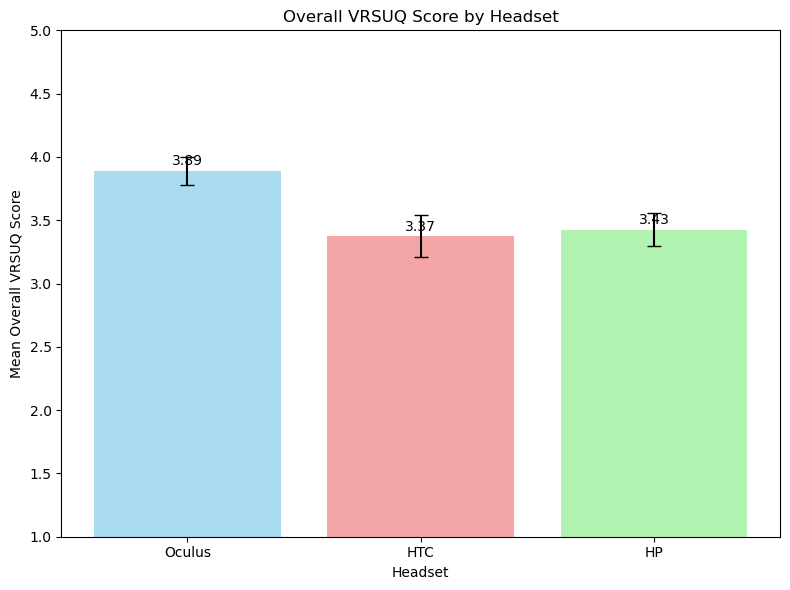

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_51316\2751827094.py:195: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = df_clean.groupby(['HeadSet', 'Gender'])['Overall'].mean().unstack()


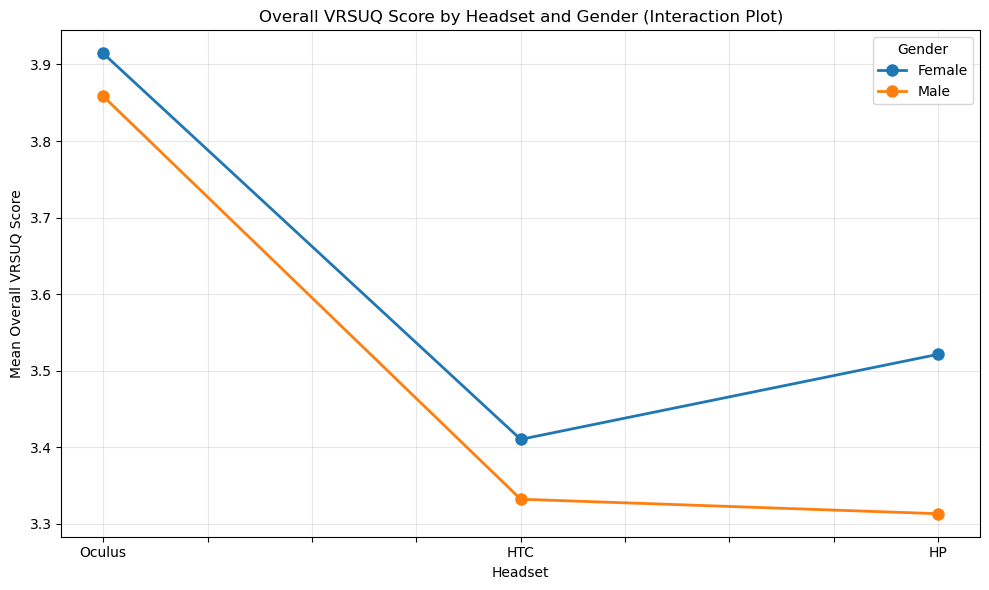

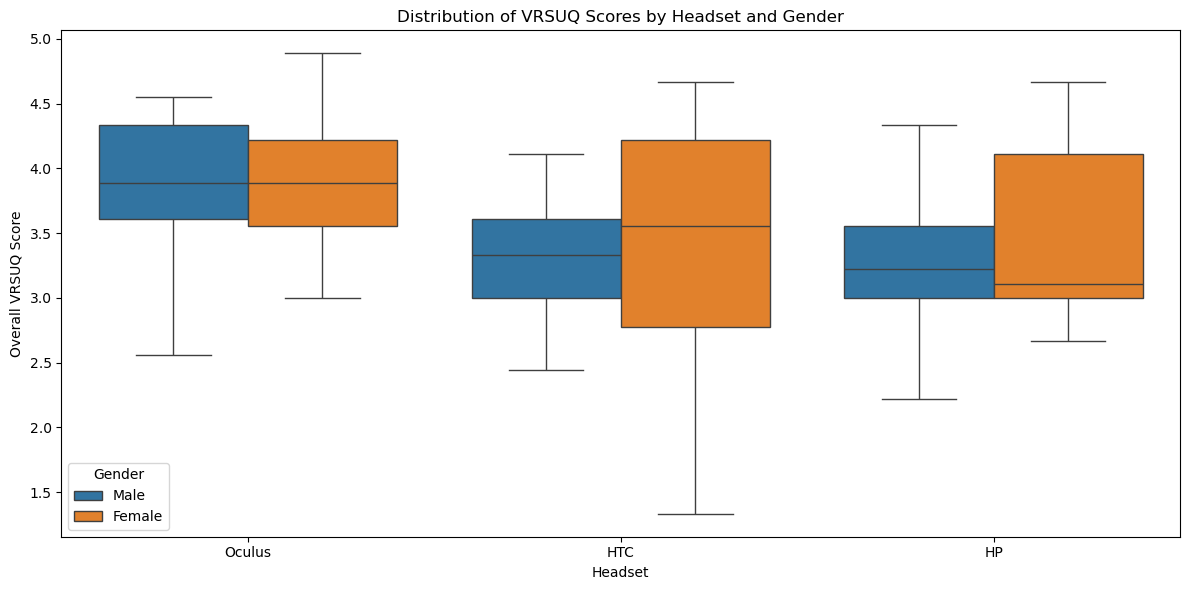


DESCRIPTIVE STATISTICS
                count   mean    std    sem
HeadSet Gender                            
Oculus  Female     13  3.915  0.503  0.140
        Male       11  3.859  0.638  0.193
HTC     Female     13  3.410  1.039  0.288
        Male       11  3.332  0.496  0.149
HP      Female     13  3.521  0.655  0.182
        Male       11  3.313  0.610  0.184

DIMENSION-SPECIFIC MIXED ANOVA ANALYSES

==================== EFFECTIVENESS ANALYSIS ====================

Data summary for Effectiveness:
Participants: 24
Observations: 72

Mixed ANOVA Results for Effectiveness:
        Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0       Gender  1.995381    1   22  1.995381  2.002264  0.171064  0.083420   
1      HeadSet  7.864198    2   44  3.932099  9.281912  0.000433  0.296718   
2  Interaction  1.051627    2   44  0.525814  1.241209  0.298956  0.053406   

        eps  
0       NaN  
1  0.990381  
2       NaN  

--- Post-hoc Analyses for Effectiveness ---

Sig

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_51316\2751827094.py:219: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_clean.groupby(['HeadSet', 'Gender'])['Overall'].agg([
C:\Users\ITXPC\AppData\Local\Temp\ipykernel_51316\2751827094.py:370: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = dim_data.groupby('HeadSet')[dim_name].mean()
C:\Users\ITXPC\AppData\Local\Temp\ipykernel_51316\2751827094.py:371: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt 

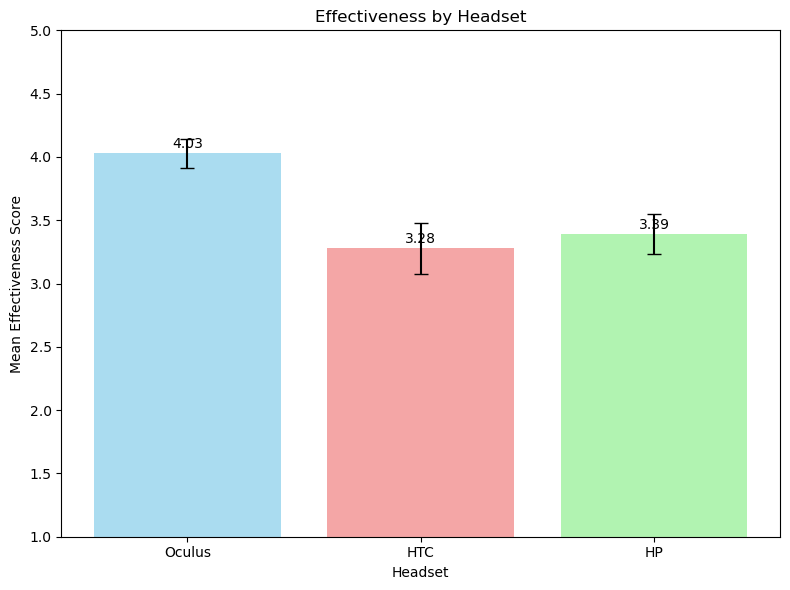

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_51316\2751827094.py:391: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = dim_data.groupby(['HeadSet', 'Gender'])[dim_name].mean().unstack()


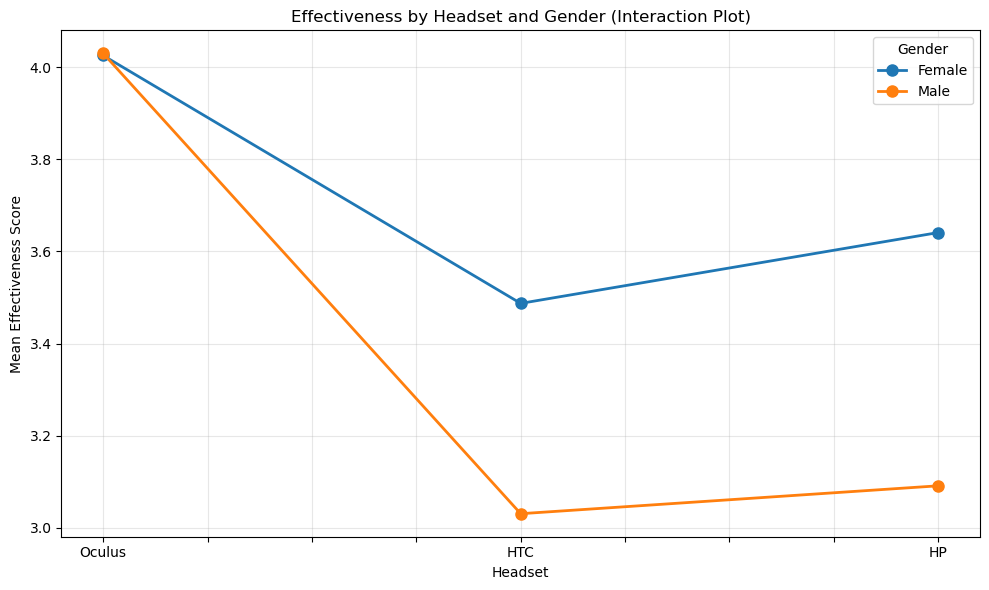

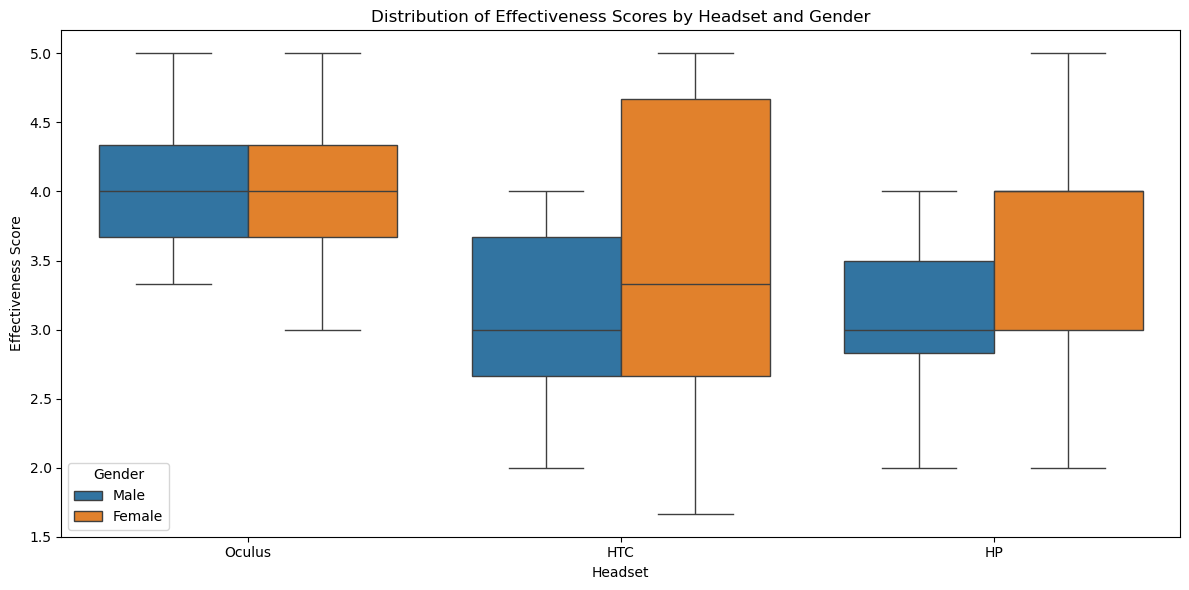


Descriptive Statistics for Effectiveness:
                count   mean    std    sem
HeadSet Gender                            
Oculus  Female     13  4.026  0.645  0.179
        Male       11  4.030  0.505  0.152
HTC     Female     13  3.487  1.152  0.319
        Male       11  3.030  0.722  0.218
HP      Female     13  3.641  0.855  0.237
        Male       11  3.091  0.560  0.169


==================== EFFICIENCY ANALYSIS ====================

Data summary for Efficiency:
Participants: 24
Observations: 72

Mixed ANOVA Results for Efficiency:
        Source        SS  DF1  DF2        MS         F     p-unc  p-GG-corr  \
0       Gender  0.223776    1   22  0.223776  0.175370  0.679443        NaN   
1      HeadSet  2.259259    2   44  1.129630  2.486860  0.094792   0.110131   
2  Interaction  1.013468    2   44  0.506734  1.115566  0.336821        NaN   

        np2       eps sphericity   W-spher   p-spher  
0  0.007908       NaN        NaN       NaN       NaN  
1  0.101559  0.775199

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_51316\2751827094.py:420: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dim_summary = dim_data.groupby(['HeadSet', 'Gender'])[dim_name].agg([
C:\Users\ITXPC\AppData\Local\Temp\ipykernel_51316\2751827094.py:370: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = dim_data.groupby('HeadSet')[dim_name].mean()
C:\Users\ITXPC\AppData\Local\Temp\ipykernel_51316\2751827094.py:371: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the

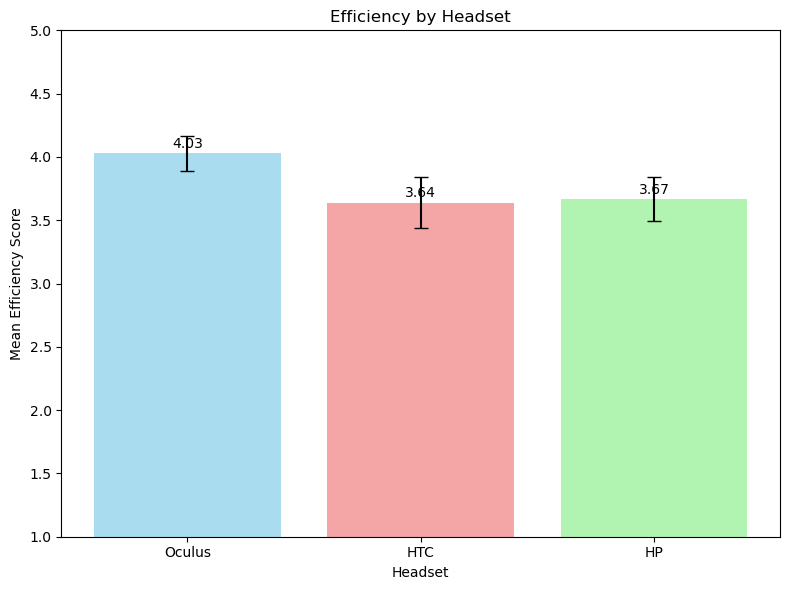

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_51316\2751827094.py:391: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = dim_data.groupby(['HeadSet', 'Gender'])[dim_name].mean().unstack()


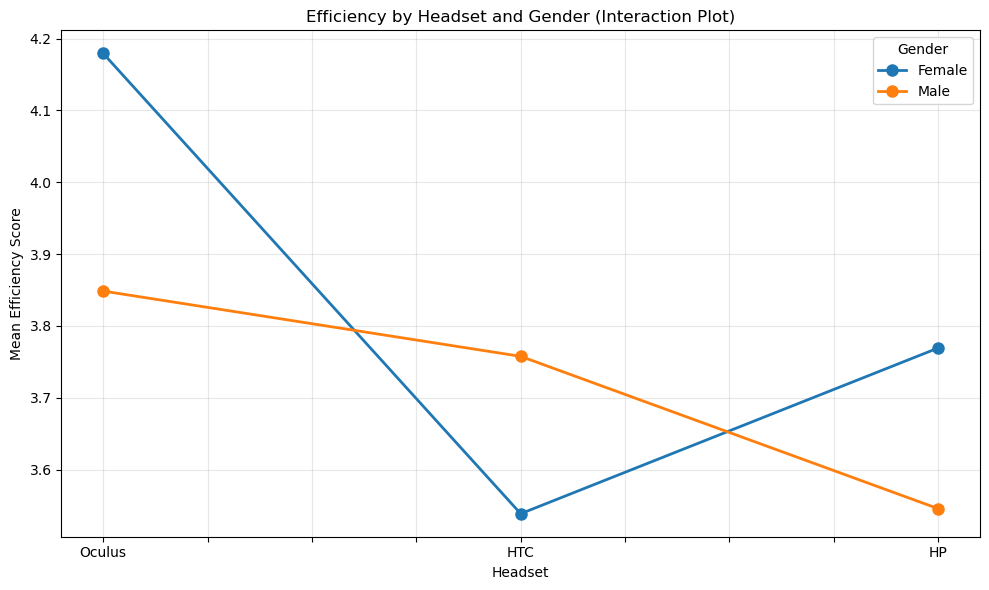

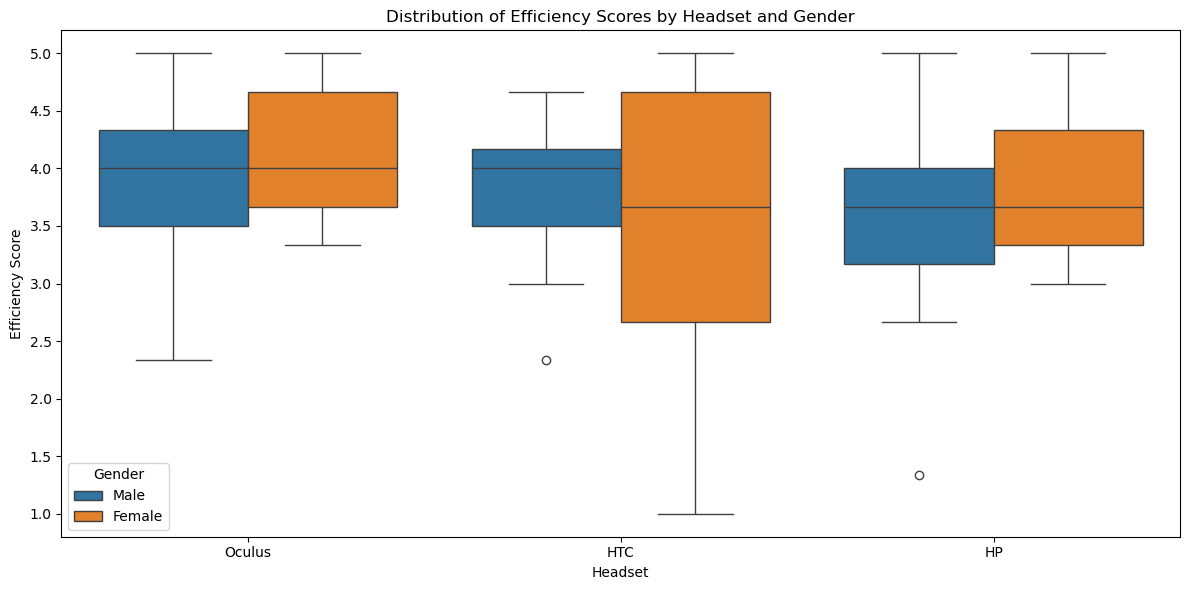


Descriptive Statistics for Efficiency:
                count   mean    std    sem
HeadSet Gender                            
Oculus  Female     13  4.179  0.587  0.163
        Male       11  3.848  0.736  0.222
HTC     Female     13  3.538  1.229  0.341
        Male       11  3.758  0.668  0.201
HP      Female     13  3.769  0.658  0.183
        Male       11  3.545  1.036  0.312


==================== SATISFACTION ANALYSIS ====================

Data summary for Satisfaction:
Participants: 24
Observations: 72

Mixed ANOVA Results for Satisfaction:
        Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0       Gender  0.216074    1   22  0.216074  0.148224  0.703936  0.006692   
1      HeadSet  2.463735    2   44  1.231867  2.943921  0.063107  0.118022   
2  Interaction  0.069158    2   44  0.034579  0.082638  0.920827  0.003742   

        eps  
0       NaN  
1  0.970571  
2       NaN  

--- Post-hoc Analyses for Satisfaction ---

No significant main effect of H

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_51316\2751827094.py:420: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dim_summary = dim_data.groupby(['HeadSet', 'Gender'])[dim_name].agg([
C:\Users\ITXPC\AppData\Local\Temp\ipykernel_51316\2751827094.py:370: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = dim_data.groupby('HeadSet')[dim_name].mean()
C:\Users\ITXPC\AppData\Local\Temp\ipykernel_51316\2751827094.py:371: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the

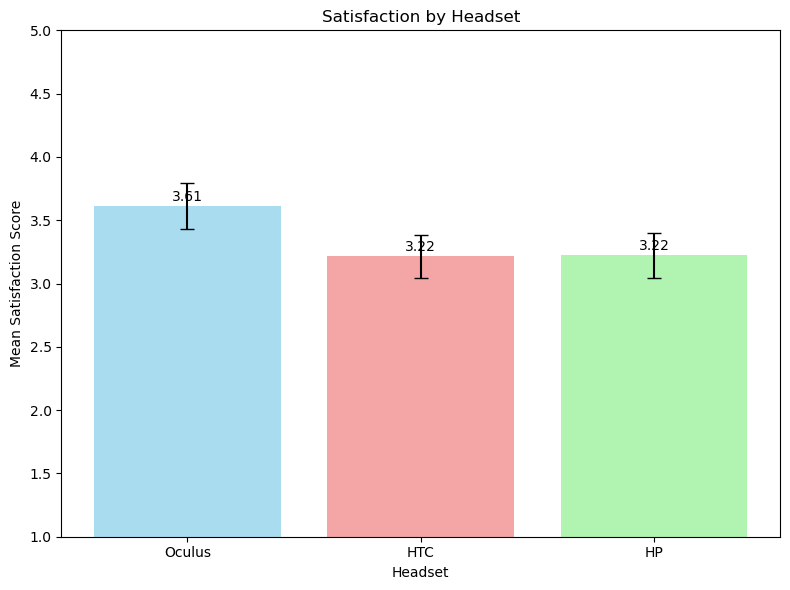

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_51316\2751827094.py:391: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = dim_data.groupby(['HeadSet', 'Gender'])[dim_name].mean().unstack()


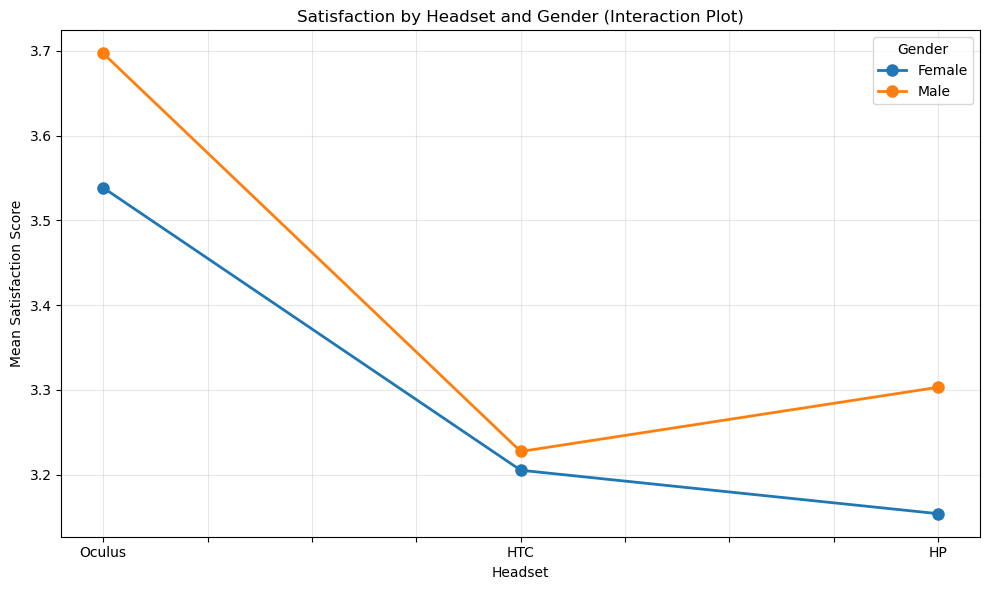

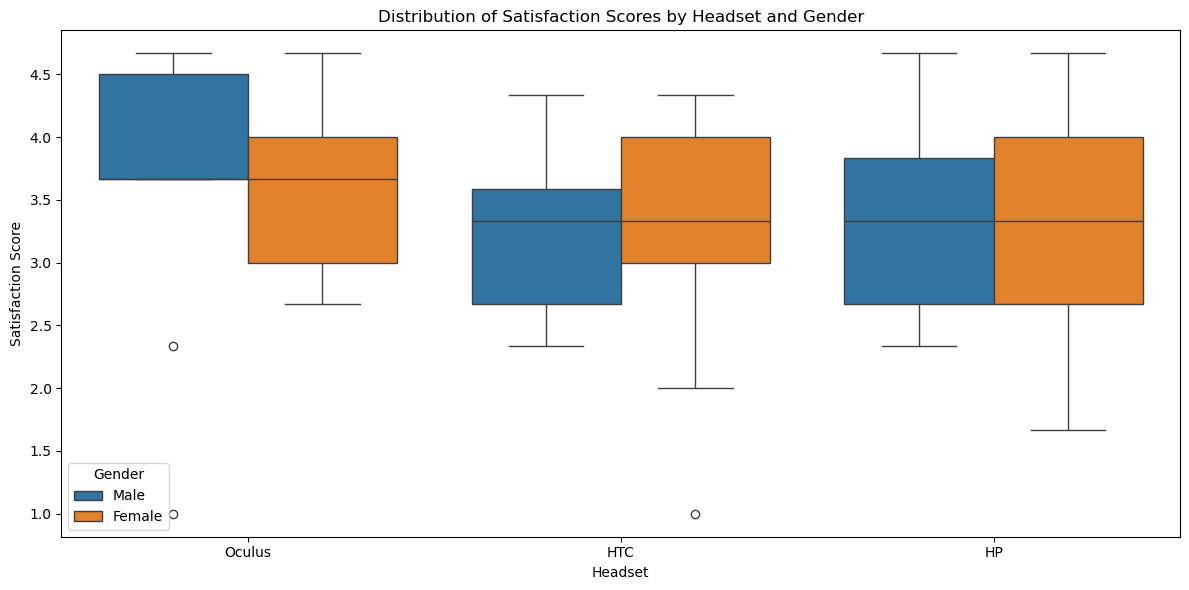


Descriptive Statistics for Satisfaction:
                count   mean    std    sem
HeadSet Gender                            
Oculus  Female     13  3.538  0.660  0.183
        Male       11  3.697  1.130  0.341
HTC     Female     13  3.205  0.938  0.260
        Male       11  3.227  0.708  0.214
HP      Female     13  3.154  0.949  0.263
        Male       11  3.303  0.781  0.236



C:\Users\ITXPC\AppData\Local\Temp\ipykernel_51316\2751827094.py:420: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dim_summary = dim_data.groupby(['HeadSet', 'Gender'])[dim_name].agg([


In [11]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r'C:\Users\ITXPC\OneDrive - The Pennsylvania State University\Amir_abb6024\ICCMJournal\Codes\VRUsability\VRSUQ.csv')

# Map Likert responses to numeric scores
mapping = {
    'strongly disagree': 1,
    'disagree': 2,
    'neutral': 3,
    'agree': 4,
    'strongly agree': 5
}
item_cols = df.columns[3:12]

# Clean and recode items
for col in item_cols:
    df[col] = df[col].str.strip().str.lower().map(mapping)

# Identify and reverse-code negative items
neg_cols = [col for col in item_cols if col.startswith('(-)')]
for col in neg_cols:
    df[col] = 6 - df[col]

# Compute overall usability score
df['Overall'] = df[item_cols].mean(axis=1)

# Clean categorical variables
df['HeadSet'] = df['HeadSet'].str.strip().astype('category')
df['HeadSet'] = df['HeadSet'].cat.set_categories(['Oculus', 'HTC', 'HP'])
df['Gender'] = df['Gender'].str.strip()

# Clean data for analysis
df_clean = df.dropna(subset=['Overall', 'HeadSet', 'Gender', 'UniqueID'])

print("Data Summary:")
print(f"Total participants: {df_clean['UniqueID'].nunique()}")
print(f"Total observations: {len(df_clean)}")
print("\nHeadset distribution:")
print(df_clean['HeadSet'].value_counts())
print("\nGender distribution:")
print(df_clean['Gender'].value_counts())

# Mixed ANOVA using pingouin
# HeadSet = within-subjects factor (repeated measures)
# Gender = between-subjects factor
print("\n" + "="*60)
print("MIXED ANOVA RESULTS")
print("="*60)

anova_result = pg.mixed_anova(
    data=df_clean,
    dv='Overall',           # Dependent variable
    within='HeadSet',       # Within-subjects factor
    between='Gender',       # Between-subjects factor
    subject='UniqueID'      # Subject identifier
)

print(anova_result)

# Effect sizes and post-hoc tests if main effects or interactions are significant
print("\n" + "="*60)
print("POST-HOC ANALYSES")
print("="*60)

# Check for significant main effect of HeadSet
headset_p = anova_result.loc[anova_result['Source'] == 'HeadSet', 'p-unc'].iloc[0]
if headset_p < 0.05:
    print(f"\nSignificant main effect of HeadSet (p = {headset_p:.4f})")
    print("Pairwise comparisons for HeadSet (with correction for multiple comparisons):")
    
    # Pairwise t-tests for headset comparisons (paired since it's within-subjects)
    pairwise_headset = pg.pairwise_tests(
        data=df_clean,
        dv='Overall',
        within='HeadSet',
        subject='UniqueID',
        padjust='bonferroni'
    )
    print(pairwise_headset[['A', 'B', 'T', 'p-unc', 'p-corr', 'hedges']])

# Check for significant main effect of Gender
gender_mask = anova_result['Source'] == 'Gender'
if gender_mask.any():
    gender_p = anova_result.loc[gender_mask, 'p-unc'].iloc[0]
    if gender_p < 0.05:
        print(f"\nSignificant main effect of Gender (p = {gender_p:.4f})")
        print("Gender means:")
        gender_means = df_clean.groupby('Gender')['Overall'].agg(['mean', 'std', 'count'])
        print(gender_means)
else:
    print("\nNo Gender effect found in results")

# Check for significant interaction - try different possible names
interaction_names = ['HeadSet * Gender', 'Gender * HeadSet', 'HeadSet:Gender', 'Interaction']
interaction_p = None
interaction_source = None

for name in interaction_names:
    interaction_mask = anova_result['Source'] == name
    if interaction_mask.any():
        interaction_p = anova_result.loc[interaction_mask, 'p-unc'].iloc[0]
        interaction_source = name
        break

# Also try looking for rows that contain both 'HeadSet' and 'Gender'
if interaction_p is None:
    for idx, source in enumerate(anova_result['Source']):
        if 'HeadSet' in str(source) and 'Gender' in str(source):
            interaction_p = anova_result.loc[idx, 'p-unc']
            interaction_source = source
            break

if interaction_p is not None:
    if interaction_p < 0.05:
        print(f"\nSignificant HeadSet × Gender interaction ({interaction_source}, p = {interaction_p:.4f})")
        print("Simple effects analysis needed - examining HeadSet effects within each Gender:")
        
        # Simple effects: HeadSet effect within each gender
        for gender in df_clean['Gender'].unique():
            gender_data = df_clean[df_clean['Gender'] == gender]
            if len(gender_data) > 0 and gender_data['UniqueID'].nunique() > 1:
                try:
                    simple_effect = pg.rm_anova(
                        data=gender_data,
                        dv='Overall',
                        within='HeadSet',
                        subject='UniqueID'
                    )
                    p_val = simple_effect['p-unc'].iloc[0]
                    print(f"\nHeadSet effect for {gender}: F = {simple_effect['F'].iloc[0]:.3f}, p = {p_val:.4f}")
                    
                    if p_val < 0.05:
                        pairwise_simple = pg.pairwise_tests(
                            data=gender_data,
                            dv='Overall',
                            within='HeadSet',
                            subject='UniqueID',
                            padjust='bonferroni'
                        )
                        print(f"Pairwise comparisons for {gender}:")
                        print(pairwise_simple[['A', 'B', 'T', 'p-unc', 'p-corr']])
                except Exception as e:
                    print(f"\nCould not perform simple effects analysis for {gender}: {e}")
    else:
        print(f"\nNo significant HeadSet × Gender interaction (p = {interaction_p:.4f})")
else:
    print("\nNo interaction effect found in results")
    print("Available sources in ANOVA results:")
    print(anova_result['Source'].tolist())

# Assumptions checking
print("\n" + "="*60)
print("ASSUMPTION CHECKS")
print("="*60)


# Normality tests by group
print("\nNormality tests (Shapiro-Wilk) by HeadSet and Gender:")
for headset in df_clean['HeadSet'].unique():
    for gender in df_clean['Gender'].unique():
        subset = df_clean[(df_clean['HeadSet'] == headset) & (df_clean['Gender'] == gender)]
        if len(subset) >= 3:  # Need at least 3 observations for Shapiro-Wilk
            normality = pg.normality(subset['Overall'])
            print(f"{headset} - {gender}: W = {normality['W'].iloc[0]:.4f}, p = {normality['pval'].iloc[0]:.4f}")

# Visualization 1: Mean overall score by headset
print("\n" + "="*60)
print("CREATING VISUALIZATIONS")
print("="*60)

means = df_clean.groupby('HeadSet')['Overall'].mean()
sems = df_clean.groupby('HeadSet')['Overall'].sem()

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(means.index, means.values, yerr=sems.values, 
              capsize=5, alpha=0.7, color=['skyblue', 'lightcoral', 'lightgreen'])
ax.set_xlabel('Headset')
ax.set_ylabel('Mean Overall VRSUQ Score')
ax.set_title('Overall VRSUQ Score by Headset')
ax.set_ylim(1, 5)

# Add value labels on bars
for bar, mean_val in zip(bars, means.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
            f'{mean_val:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Visualization 2: Overall score by headset, split by gender (interaction plot)
pivot = df_clean.groupby(['HeadSet', 'Gender'])['Overall'].mean().unstack()

fig, ax = plt.subplots(figsize=(10, 6))
pivot.plot(kind='line', marker='o', linewidth=2, markersize=8, ax=ax)
ax.set_xlabel('Headset')
ax.set_ylabel('Mean Overall VRSUQ Score')
ax.set_title('Overall VRSUQ Score by Headset and Gender (Interaction Plot)')
ax.legend(title='Gender')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualization 3: Box plot showing distributions
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df_clean, x='HeadSet', y='Overall', hue='Gender', ax=ax)
ax.set_xlabel('Headset')
ax.set_ylabel('Overall VRSUQ Score')
ax.set_title('Distribution of VRSUQ Scores by Headset and Gender')
plt.tight_layout()
plt.show()

# Summary statistics
print("\nDESCRIPTIVE STATISTICS")
print("="*60)
summary_stats = df_clean.groupby(['HeadSet', 'Gender'])['Overall'].agg([
    'count', 'mean', 'std', 'sem'
]).round(3)
print(summary_stats)

# ================================================================
# DIMENSION-SPECIFIC ANALYSES
# ================================================================

print("\n" + "="*80)
print("DIMENSION-SPECIFIC MIXED ANOVA ANALYSES")
print("="*80)

# Define dimension item groups based on Table 2
effectiveness_items = item_cols[:3]  # items 1-3
efficiency_items = item_cols[3:6]    # items 4-6
satisfaction_items = item_cols[6:9]  # items 7-9

# Compute dimension scores
df_clean['Effectiveness'] = df_clean[effectiveness_items].mean(axis=1)
df_clean['Efficiency'] = df_clean[efficiency_items].mean(axis=1)
df_clean['Satisfaction'] = df_clean[satisfaction_items].mean(axis=1)

# Function to analyze each dimension with pingouin
def analyze_dimension_pingouin(dim_name, df_data):
    print(f"\n{'='*20} {dim_name.upper()} ANALYSIS {'='*20}")
    
    # Clean data for this dimension
    dim_data = df_data.dropna(subset=[dim_name, 'HeadSet', 'Gender', 'UniqueID'])
    
    if len(dim_data) == 0:
        print(f"No valid data for {dim_name}")
        return
    
    print(f"\nData summary for {dim_name}:")
    print(f"Participants: {dim_data['UniqueID'].nunique()}")
    print(f"Observations: {len(dim_data)}")
    
    # Mixed ANOVA
    try:
        anova_result = pg.mixed_anova(
            data=dim_data,
            dv=dim_name,
            within='HeadSet',
            between='Gender',
            subject='UniqueID'
        )
        print(f"\nMixed ANOVA Results for {dim_name}:")
        print(anova_result)
        
        # Post-hoc analyses
        print(f"\n--- Post-hoc Analyses for {dim_name} ---")
        
        # Main effect of HeadSet
        headset_mask = anova_result['Source'] == 'HeadSet'
        if headset_mask.any():
            headset_p = anova_result.loc[headset_mask, 'p-unc'].iloc[0]
            if headset_p < 0.05:
                print(f"\nSignificant main effect of HeadSet (p = {headset_p:.4f})")
                pairwise_headset = pg.pairwise_tests(
                    data=dim_data,
                    dv=dim_name,
                    within='HeadSet',
                    subject='UniqueID',
                    padjust='bonferroni'
                )
                print("Pairwise comparisons for HeadSet:")
                print(pairwise_headset[['A', 'B', 'T', 'p-unc', 'p-corr', 'hedges']])
            else:
                print(f"\nNo significant main effect of HeadSet (p = {headset_p:.4f})")
        
        # Main effect of Gender
        gender_mask = anova_result['Source'] == 'Gender'
        if gender_mask.any():
            gender_p = anova_result.loc[gender_mask, 'p-unc'].iloc[0]
            if gender_p < 0.05:
                print(f"\nSignificant main effect of Gender (p = {gender_p:.4f})")
                gender_means = dim_data.groupby('Gender')[dim_name].agg(['mean', 'std', 'count'])
                print("Gender means:")
                print(gender_means)
            else:
                print(f"\nNo significant main effect of Gender (p = {gender_p:.4f})")
        
        # Interaction effect
        interaction_names = ['HeadSet * Gender', 'Gender * HeadSet', 'HeadSet:Gender']
        interaction_p = None
        interaction_source = None
        
        for name in interaction_names:
            interaction_mask = anova_result['Source'] == name
            if interaction_mask.any():
                interaction_p = anova_result.loc[interaction_mask, 'p-unc'].iloc[0]
                interaction_source = name
                break
        
        if interaction_p is not None:
            if interaction_p < 0.05:
                print(f"\nSignificant HeadSet × Gender interaction (p = {interaction_p:.4f})")
                # Simple effects analysis
                for gender in dim_data['Gender'].unique():
                    gender_subset = dim_data[dim_data['Gender'] == gender]
                    if gender_subset['UniqueID'].nunique() > 1:
                        try:
                            simple_effect = pg.rm_anova(
                                data=gender_subset,
                                dv=dim_name,
                                within='HeadSet',
                                subject='UniqueID'
                            )
                            se_p = simple_effect['p-unc'].iloc[0]
                            print(f"HeadSet effect for {gender}: F = {simple_effect['F'].iloc[0]:.3f}, p = {se_p:.4f}")
                        except Exception as e:
                            print(f"Could not analyze simple effects for {gender}: {e}")
            else:
                print(f"\nNo significant HeadSet × Gender interaction (p = {interaction_p:.4f})")
        
    except Exception as e:
        print(f"Error running mixed ANOVA for {dim_name}: {e}")
        print("Attempting repeated measures ANOVA without between-subjects factor...")
        
        # Fallback to simple repeated measures ANOVA
        try:
            rm_anova_result = pg.rm_anova(
                data=dim_data,
                dv=dim_name,
                within='HeadSet',
                subject='UniqueID'
            )
            print(f"\nRepeated Measures ANOVA Results for {dim_name}:")
            print(rm_anova_result)
            
            rm_p = rm_anova_result['p-unc'].iloc[0]
            if rm_p < 0.05:
                print(f"\nSignificant effect of HeadSet (p = {rm_p:.4f})")
                pairwise_rm = pg.pairwise_tests(
                    data=dim_data,
                    dv=dim_name,
                    within='HeadSet',
                    subject='UniqueID',
                    padjust='bonferroni'
                )
                print("Pairwise comparisons:")
                print(pairwise_rm[['A', 'B', 'T', 'p-unc', 'p-corr', 'hedges']])
            
        except Exception as e2:
            print(f"Error running repeated measures ANOVA: {e2}")
    
    # Visualizations
    print(f"\n--- Visualizations for {dim_name} ---")
    
    # Plot 1: Mean by headset
    means = dim_data.groupby('HeadSet')[dim_name].mean()
    sems = dim_data.groupby('HeadSet')[dim_name].sem()
    
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(means.index, means.values, yerr=sems.values, 
                  capsize=5, alpha=0.7, color=['skyblue', 'lightcoral', 'lightgreen'])
    ax.set_title(f'{dim_name} by Headset')
    ax.set_ylabel(f'Mean {dim_name} Score')
    ax.set_xlabel('Headset')
    ax.set_ylim(1, 5)
    
    # Add value labels
    for bar, mean_val in zip(bars, means.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                f'{mean_val:.2f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Plot 2: Interaction plot
    try:
        pivot = dim_data.groupby(['HeadSet', 'Gender'])[dim_name].mean().unstack()
        if not pivot.empty:
            fig, ax = plt.subplots(figsize=(10, 6))
            pivot.plot(kind='line', marker='o', linewidth=2, markersize=8, ax=ax)
            ax.set_title(f'{dim_name} by Headset and Gender (Interaction Plot)')
            ax.set_ylabel(f'Mean {dim_name} Score')
            ax.set_xlabel('Headset')
            ax.legend(title='Gender')
            ax.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
    except Exception as e:
        print(f"Could not create interaction plot: {e}")
    
    # Plot 3: Box plot
    try:
        fig, ax = plt.subplots(figsize=(12, 6))
        sns.boxplot(data=dim_data, x='HeadSet', y=dim_name, hue='Gender', ax=ax)
        ax.set_title(f'Distribution of {dim_name} Scores by Headset and Gender')
        ax.set_ylabel(f'{dim_name} Score')
        ax.set_xlabel('Headset')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not create box plot: {e}")
    
    # Summary statistics
    print(f"\nDescriptive Statistics for {dim_name}:")
    try:
        dim_summary = dim_data.groupby(['HeadSet', 'Gender'])[dim_name].agg([
            'count', 'mean', 'std', 'sem'
        ]).round(3)
        print(dim_summary)
    except Exception as e:
        print(f"Could not generate summary statistics: {e}")
    
    print(f"\n{'='*60}")

# Analyze each dimension
dimensions = ['Effectiveness', 'Efficiency', 'Satisfaction']
for dimension in dimensions:
    analyze_dimension_pingouin(dimension, df_clean)

Effectiveness
Intercept (Oculus, Female): 4.026 (p < .001)

HTC vs. Oculus: –0.538 (p = .035) – participants rated HTC significantly less effective than Oculus.

HP vs. Oculus: –0.385 (p = .132) – trend toward lower effectiveness for HP, but not significant.

Gender and interactions: no significant main effect or interactions (all p > .5).

<figure> <!-- Bar chart: Effectiveness by headset --> <figcaption>Mean Effectiveness score by headset (± SEM)</figcaption> </figure> <figure> <!-- Line plot: Effectiveness by headset & gender --> <figcaption>Effectiveness score trends across headsets for each gender</figcaption> </figure>
Efficiency
Intercept (Oculus, Female): 3.915 (p < .001)

HTC vs. Oculus: –0.333 (p = .189) – not significant.

HP vs. Oculus: –0.385 (p = .130) – not significant.

Gender and interactions: no significant effects (all p > .6).

<figure> <!-- Bar chart: Efficiency by headset --> <figcaption>Mean Efficiency score by headset (± SEM)</figcaption> </figure> <figure> <!-- Line plot: Efficiency by headset & gender --> <figcaption>Efficiency score trends across headsets for each gender</figcaption> </figure>
Satisfaction
Intercept (Oculus, Female): 3.538 (p < .001)

HTC vs. Oculus: –0.385 (p = .130) – not significant.

HP vs. Oculus: –0.385 (p = .113) – not significant.

Gender and interactions: all p > .7, no gender differences.

<figure> <!-- Bar chart: Satisfaction by headset --> <figcaption>Mean Satisfaction score by headset (± SEM)</figcaption> </figure> <figure> <!-- Line plot: Satisfaction by headset & gender --> <figcaption>Satisfaction score trends across headsets for each gender</figcaption> </figure>
Summary:

Effectiveness shows a significant drop for HTC relative to Oculus (p = .035), while Efficiency and Satisfaction differences are not statistically significant.

Gender had no measurable impact on any dimension, nor any interaction with headset.



1. Overall Usability
Model setup:

Baseline: Female participants wearing the Oculus.

Random intercepts: Account for each participant’s overall tendency to rate higher or lower.

| Predictor                         |  Coef. | p-value | Interpretation                                                                  |
| --------------------------------- | -----: | ------: | ------------------------------------------------------------------------------- |
| **Intercept (Oculus, Female)**    |  3.915 |   <.001 | On average, Oculus users rated overall usability at \~3.92 out of 5.            |
| **HTC vs. Oculus**                | –0.504 |   0.011 | HTC scores were **0.50 points lower** than Oculus (significant).                |
| **HP vs. Oculus**                 | –0.393 |   0.048 | HP scores were **0.39 points lower** than Oculus (borderline but below α=0.05). |
| **Male vs. Female**               | –0.056 |   0.843 | Men and women gave virtually identical overall ratings (no gender effect).      |
| **Headset × Gender interactions** |    \~0 |     >.6 | Gender did not change the headset differences (no interaction).                 |

What this means:

Oculus clearly outperforms both HTC and HP on overall usability.

The drop is largest for HTC (half a point lower), and significant even after accounting for individual differences.

Gender doesn’t play a role—men and women agree on which headset “feels” most usable.


2. Effectiveness

| Predictor                      |  Coef. | p-value | Interpretation                                                               |
| ------------------------------ | -----: | ------: | ---------------------------------------------------------------------------- |
| **Intercept (Oculus, Female)** |  4.026 |   <.001 | Oculus was rated highly on effectiveness (≈4.03/5).                          |
| **HTC vs. Oculus**             | –0.538 |   0.035 | HTC was **0.54 points less effective** than Oculus (significant).            |
| **HP vs. Oculus**              | –0.385 |   0.132 | HP trended lower on effectiveness (–0.39) but not statistically significant. |
| **Gender & interactions**      |    \~0 |     >.5 | No gender differences or interactions.                                       |

Take-away:

Participants found the Oculus noticeably more “effective”—that is, better feedback, fewer errors, and more predictable behavior—than HTC.

HP was rated slightly lower, but we can’t rule out chance (p=0.13).

3. Efficiency

| Predictor                      |  Coef. | p-value | Interpretation                                            |
| ------------------------------ | -----: | ------: | --------------------------------------------------------- |
| **Intercept (Oculus, Female)** |  3.915 |   <.001 | Oculus efficiency ≈3.92/5.                                |
| **HTC vs. Oculus**             | –0.333 |   0.189 | HTC slightly less efficient (–0.33), but not significant. |
| **HP vs. Oculus**              | –0.385 |   0.130 | HP slightly less efficient (–0.39), but not significant.  |
| **Gender & interactions**      |    \~0 |     >.6 | No gender differences or interactions.                    |

Take-away:

No clear efficiency differences across headsets—each felt about equally quick and easy once learned.

The small numeric drop for HTC and HP didn’t reach significance.


4. Satisfaction

| Predictor                      |  Coef. | p-value | Interpretation                                         |
| ------------------------------ | -----: | ------: | ------------------------------------------------------ |
| **Intercept (Oculus, Female)** |  3.538 |   <.001 | Oculus satisfaction ≈3.54/5.                           |
| **HTC vs. Oculus**             | –0.385 |   0.130 | HTC slightly less satisfying, but not significant.     |
| **HP vs. Oculus**              | –0.385 |   0.113 | HP also slightly less satisfying, but not significant. |
| **Gender & interactions**      |    \~0 |     >.7 | No gender differences or interactions.                 |

Take-away:

Satisfaction ratings are statistically indistinguishable across headsets—users felt similarly comfortable, pleasurable, and free from discomfort.

Oculus had the edge numerically, but the gap wasn’t large enough to rule out chance at the conventional 5% level.

Overall Conclusion
Oculus is the clear winner overall, driven primarily by stronger perceived Effectiveness.

Efficiency and Satisfaction did not differ significantly—once users learned the controls, all headsets felt comparably efficient and comfortable.

Gender plays no role in usability ratings for any dimension.

These results suggest that if your priority is a headset that “just works” (i.e., predictable performance, clear feedback, minimal errors), the Oculus leads. If efficiency or comfort is your sole concern, the three options may be interchangeable—though Oculus still sits at the top numerically.

